In [1]:
import numpy as np
import matplotlib.pyplot as plt
## LOW LEVEL OPERATIONS
pe = {
# Gabor
'v_max':  5,
'u_max':  8, 
'k_max' : 3.14159/2., 
'f' : 1.41421,
'sigma': 3.14159*2,
}

class Dict(dict):
    __setattr__ = dict.__setitem__
    __getattr__ = dict.__getitem__
pe = Dict(pe)

In [2]:
# adapted from https://github.com/qshobak/Transformation-invariant-Gabor-Convolutional-Networks/blob/master/GaborLayer.py
def showGaborFilterBank(h, w):
	fig, ax = plt.subplots(1, 1, figsize=(6,6))
	sigma = 2 * np.pi
	sqsigma = sigma ** 2
	postmean = np.exp(-sqsigma / 2)

	gfilter = np.zeros((pe.u_max, pe.v_max, h, w))
	FT_gfilter = np.zeros((pe.u_max, pe.v_max, h, w))
	image_gabor = np.zeros((pe.u_max*h, pe.v_max*w))

	for i in range(pe.u_max):
		for j in range(pe.v_max):
			k = pe.k_max / pe.f ** j
			theta = (pe.u_max//2-i) / pe.u_max * np.pi
			kcos = k * np.cos(theta)
			ksin = k * np.sin(theta)
			for y in range(h):
				for x in range(w):
					y1 = y + 1 - ((h + 1) / 2)
					x1 = x + 1 - ((w + 1) / 2)
					tmp1 = np.exp(-(k * k * (x1 * x1 + y1 * y1) / (2 * sqsigma)))
					tmp2 = np.exp(1j * (kcos * x1 + ksin * y1))- postmean
					gfilter[i][j][y][x] = k * k * tmp1 * tmp2 / sqsigma
			# half magnitude in Fourier domain:
			FT_gfilter[i][j] = np.abs(np.fft.fftshift(np.fft.fft2(gfilter[i][j])))
			ax.contour(FT_gfilter[i][j], levels=[FT_gfilter[i][j].max()/2])
			# Max_Min for real part:
			xymax = np.max(gfilter[i][j].real)
			xymin = np.min(gfilter[i][j].real)
			gfilter_real = (gfilter[i][j].real - xymin) / (xymax - xymin)
			# normalizing energy for real part:
			gfilter_real /= np.sqrt((np.abs(gfilter_real)**2).mean())
			gfilter_real *= np.sqrt(2.)
			image_gabor[(i*h):(i*h+h), (j*w):(j*w+w)] = gfilter_real
	ax.set_xlabel(r'$f_Y$', fontsize=12)
	ax.set_ylabel(r'$f_X$', fontsize=12)
	fig2, ax2 = plt.subplots(1, 1, figsize=(10,10))
	ax2.imshow(image_gabor.T,cmap="gray")	
	ax2.set_yticks(np.arange(pe.v_max)*w + w/2)
	ax2.set_yticklabels([r'$v=0$',r'$v=1$',r'$v=2$',r'$v=3$',r'$v=4$'], fontsize=12)
	ax2.set_xticks(np.arange(pe.u_max)*h + h/2)
	ax2.set_xticklabels([r'$\theta=0$','',r'$\theta=\pi/4$','',r'$\theta=\pi/2$','',r'$\theta=3\pi/4$',''], fontsize=12)

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


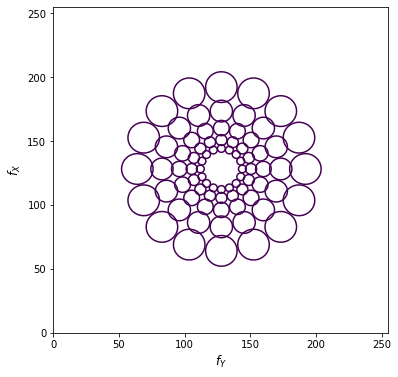

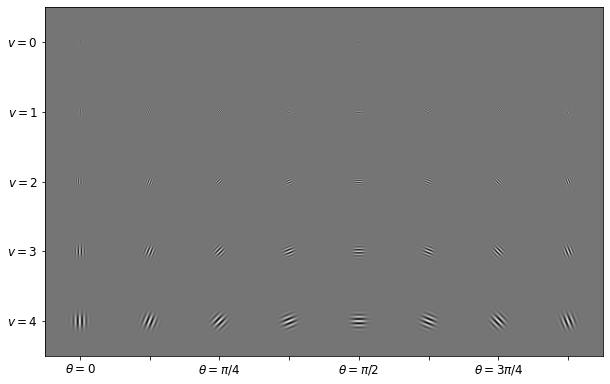

In [3]:
test = showGaborFilterBank(h=256, w=256)